In [1]:
#Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
jan = pd.read_csv('data-prakiraan-cuaca-bulan-januari-2018.csv',encoding='cp1252')
feb = pd.read_csv('data-prakiraan-cuaca-bulan-februari-2018.csv',encoding='cp1252')
mar = pd.read_csv('data-prakiraan-cuaca-bulan-maret-2018.csv',encoding='cp1252')
apr = pd.read_csv('data-prakiraan-cuaca-bulan-april-2018.csv',encoding='cp1252')
mei = pd.read_csv('data-prakiraan-cuaca-bulan-mei-2018.csv',encoding='cp1252')
jun = pd.read_csv('data-prakiraan-cuaca-bulan-juni-2018.csv',encoding='cp1252')
jul = pd.read_csv('data-prakiraan-cuaca-bulan-juli-2018.csv',encoding='cp1252')
agu = pd.read_csv('data-prakiraan-cuaca-bulan-agustus-2018.csv',encoding='cp1252')
sep = pd.read_csv('data-prakiraan-cuaca-bulan-september-2018.csv',encoding='cp1252')
okt = pd.read_csv('data-prakiraan-cuaca-bulan-oktober-2018.csv',encoding='cp1252')
nov = pd.read_csv('data-prakiraan-cuaca-bulan-november-2018.csv',encoding='cp1252')
des = pd.read_csv('data-prakiraan-cuaca-bulan-desember-2018.csv',encoding='cp1252')

In [3]:
#Dropping Missing Value
jan = jan.dropna()
jan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tanggal               720 non-null    object
 1   wilayah               720 non-null    object
 2   waktu                 720 non-null    object
 3   cuaca                 720 non-null    object
 4   kelembaban_persen     720 non-null    object
 5   suhu_derajat_celcius  720 non-null    object
dtypes: object(6)
memory usage: 39.4+ KB


In [4]:
# Merging File
df = pd.concat([jan,feb,mar,apr,mei,jun,jul,agu,sep,okt,nov,des])
df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius
0,2018-01-02,Jakarta Timur,Pagi,Cerah Berawan,65 – 95,23 – 32
1,2018-01-02,Jakarta Barat,Pagi,Cerah,65 – 95,23 – 32
2,2018-01-02,Jakarta Selatan,Pagi,Cerah Berawan,65 – 95,23 – 32
3,2018-01-02,Kepulauan Seribu,Pagi,Cerah,65 – 95,23 – 32
4,2018-01-02,Jakarta Pusat,Pagi,Cerah,65 – 95,23 – 32


In [5]:
df.shape

(8400, 6)

# Data Cleansing

In [6]:
df['waktu'].unique()

array(['Pagi', 'Siang', 'Malam', 'Dini Hari', 'pagi', 'siang', 'malam',
       'dini hari'], dtype=object)

In [7]:
#mapping Waktu
df['waktu'] = df['waktu'].map({'Pagi':'Pagi','Siang':'Siang','Malam':'Malam','Dini Hari':'Dini Hari','pagi':'Pagi','siang':'Siang','malam':'Malam','dini hari':'Dini Hari'})

In [8]:
# Menghapus data tanggal 31 pada bulan november, karena tidak ada tanggal 31 pada bulan november 
tgl = '2018-11-31'
df = df[df['tanggal'] != tgl]

In [9]:
df['tanggal'] = pd.to_datetime(df['tanggal'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8376 entries, 0 to 719
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tanggal               8376 non-null   datetime64[ns]
 1   wilayah               8376 non-null   object        
 2   waktu                 8376 non-null   object        
 3   cuaca                 8376 non-null   object        
 4   kelembaban_persen     8376 non-null   object        
 5   suhu_derajat_celcius  8376 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 458.1+ KB


In [11]:
# Mapping data Wilayah
df['wilayah'] = df['wilayah'].map({'Jakarta Timur':'Jakarta Timur','Jakarta Barat':'Jakarta Barat','Jakarta Selatan':'Jakarta Selatan','Kepulauan Seribu':'Kepulauan Seribu','Jakarta Pusat':'Jakarta Pusat','Jakarta Utara':'Jakarta Utara'})

In [12]:
df['wilayah'].unique()

array(['Jakarta Timur', 'Jakarta Barat', 'Jakarta Selatan',
       'Kepulauan Seribu', 'Jakarta Pusat', 'Jakarta Utara'], dtype=object)

In [13]:
# Mapping data Cuaca
df["cuaca"] = df['cuaca'].map({'Cerah Berawan': 'Cerah Berawan','Cerah': 'Cerah','Hujan Ringan': 'Hujan Ringan','Hujan Lokal': 'Hujan Lokal','Berawan': 'Berawan','Berawan Tebal': 'Berawan Tebal','Cerah Berawan ': 'Cerah Berawan','Hujan Petir': 'Hujan Petir',' Berawan': 'Berawan','Berawan ': 'Berawan','Hujan Ringan ': 'Hujan Ringan','Hujan Lokal ': 'Hujan Lokal','Hujan Sedang': 'Hujan Sedang','Hujan Loka': 'Hujan Lokal','Hujang Sedang': 'Hujan Sedang','Cerah berawan': 'Cerah Berawan','Berawa': 'Berawan','Hujan Ringanl': 'Hujan Ringan','Cerah ': 'Cerah','Hujan Sedang ': 'Hujan Sedang','Hujan Petir ': 'Hujan Petir','Hujan': 'Hujan','Cerah  ': 'Cerah','Cerah Berawah': 'Cerah Berawan','Beawan': 'Berawan','Cerang Berawan': 'Cerah Berawan','Cerah Berawn': 'Cerah Berawan'})

In [14]:
df['cuaca'].unique()

array(['Cerah Berawan', 'Cerah', 'Hujan Ringan', 'Hujan Lokal', 'Berawan',
       'Berawan Tebal', 'Hujan Petir', 'Hujan Sedang', 'Hujan'],
      dtype=object)

In [15]:
# Cleaning column suhu_derajat_celcius
df['suhu_derajat_celcius'] = df['suhu_derajat_celcius'].str.strip('°')  # Remove the degree symbol

# Menghitung rata-rata suhu
df['rata-rata_suhu'] = df['suhu_derajat_celcius'].apply(lambda x: np.mean([int(i) for i in x.split('–')]) if '–' in x else np.nan)
df['rata-rata_suhu'] = df['rata-rata_suhu'].fillna(df['suhu_derajat_celcius'].apply(lambda x: np.mean([int(i) for i in x.split('-')]) if '-' in x else np.nan))

In [16]:
# Cleaning Column kelembaban_persen

df['kelembaban_persen'] = df['kelembaban_persen'].str.replace('%', '')
df['kelembaban_persen'] = df['kelembaban_persen'].str.replace('-', ' - ')
df['kelembaban_persen'].unique()

array([' 65 – 95', '70 – 95', '70 – 90', '75 – 95', '65 – 95', '60 – 85',
       '60 – 90', '80 – 95', '70 – 95 ', '65 – 100', '75 – 100',
       '80 – 100', '65 – 90', '85 – 95', '70 – 100', '75 – 100 ',
       '75 – 95 ', '85 – 100 ', '80 – 100 ', '65 – 95 ', '80 – 95 ',
       '60 – 100 ', '60 – 95 ', '65 – 90 ', '70 – 100 ', '65 - 95',
       '70 - 95', '80 - 100', '65 - 100', '60 - 90', '65 - 90', '75 - 95',
       '75 - 90', '60 - 95', '80 - 95', '55 - 85', ' 55 – 90', '55 – 95',
       '55 – 90', '50 – 90', '60 – 95', '60 – 90 ', '50 – 95', '55 – 85',
       '55 – 90 ', '50 – 85', '55 – 95 ', '45 – 85 ', '35 – 75 ',
       '45 – 80 ', '50 – 80 ', '50 – 85 ', '50 – 90 ', '55 – 85 ',
       '70 – 90 ', ' 45 – 90', ' 40 – 95', ' 45 – 80', ' 45 – 75',
       ' 55 – 85', ' 60 – 85', ' 60 – 80', ' 60 – 90', ' 50 – 85',
       ' 45 – 85', ' 55 – 80', ' 65 – 90', ' 60 – 95', ' 65 – 85',
       ' 50 – 90', ' 55 – 95', ' 40 – 80', ' 35 – 75', ' 50 – 80',
       ' 40 – 85', ' 40 – 75', ' 7

In [17]:
# Membersihkan kolom 'kelembaban_persen'
df['kelembaban_persen'] = df['kelembaban_persen'].str.strip()  # Menghapus spasi awal/akhir

#Mencari rata-rata
df['rata-rata_kelembaban_persen'] = df['kelembaban_persen'].apply(lambda x: np.mean([int(i) for i in x.split('–')]) if '–' in x else np.nan)
df['rata-rata_kelembaban_persen'] = df['rata-rata_kelembaban_persen'].fillna(df['kelembaban_persen'].apply(lambda x: np.mean([int(i) for i in x.split('-')]) if '-' in x else np.nan))

In [18]:
df['rata-rata_kelembaban_persen']

0      80.0
1      80.0
2      80.0
3      80.0
4      80.0
       ... 
715    80.0
716    80.0
717    80.0
718    80.0
719    80.0
Name: rata-rata_kelembaban_persen, Length: 8376, dtype: float64

In [19]:
df['rata-rata_kelembaban_persen'].unique()

array([80. , 82.5, 85. , 72.5, 75. , 87.5, 90. , 77.5, 92.5, 70. , 67.5,
       65. , 55. , 62.5, 60. , 57.5])

In [20]:
df = df[['tanggal','wilayah','waktu','cuaca','rata-rata_kelembaban_persen','rata-rata_suhu']]

In [21]:
df.shape

(8376, 6)

# Exploratory Data Analaysis

## 1. Kota apa yang memiliki suhu tertinggi dan suhu terendah ? 

In [22]:
# kota-kota yang memiliki suhu terendah
df[df['rata-rata_suhu'] == df['rata-rata_suhu'].min()]

,tanggal,wilayah,waktu,cuaca,rata-rata_kelembaban_persen,rata-rata_suhu
144,2018-02-07,Jakarta Timur,Pagi,Berawan,85.0,25.5
145,2018-02-07,Jakarta Barat,Pagi,Berawan,85.0,25.5
146,2018-02-07,Jakarta Selatan,Pagi,Berawan,85.0,25.5
147,2018-02-07,Kepulauan Seribu,Pagi,Cerah Berawan,85.0,25.5
148,2018-02-07,Jakarta Pusat,Pagi,Berawan,85.0,25.5
149,2018-02-07,Jakarta Utara,Pagi,Berawan,85.0,25.5
150,2018-02-07,Jakarta Timur,Siang,Hujan Sedang,85.0,25.5
151,2018-02-07,Jakarta Barat,Siang,Hujan Lokal,85.0,25.5
152,2018-02-07,Jakarta Selatan,Siang,Hujan Sedang,85.0,25.5
153,2018-02-07,Kepulauan Seribu,Siang,Cerah Berawan,85.0,25.5


In [23]:
# kota-kota yang memiliki suhu tertinggi
df[df['rata-rata_suhu'] == df['rata-rata_suhu'].max()]

,tanggal,wilayah,waktu,cuaca,rata-rata_kelembaban_persen,rata-rata_suhu
144,2018-10-08,Jakarta Timur,Pagi,Cerah Berawan,57.5,30.0
145,2018-10-08,Jakarta Barat,Pagi,Cerah Berawan,57.5,30.0
146,2018-10-08,Jakarta Selatan,Pagi,Cerah Berawan,57.5,30.0
147,2018-10-08,Kepulauan Seribu,Pagi,Berawan,57.5,30.0
148,2018-10-08,Jakarta Pusat,Pagi,Cerah Berawan,57.5,30.0
...,...,...,...,...,...,...
235,2018-11-11,Jakarta Barat,Dini Hari,Cerah Berawan,72.5,30.0
236,2018-11-11,Jakarta Selatan,Dini Hari,Cerah Berawan,72.5,30.0
237,2018-11-11,Kepulauan Seribu,Dini Hari,Cerah Berawan,72.5,30.0
238,2018-11-11,Jakarta Pusat,Dini Hari,Cerah Berawan,72.5,30.0


# 2. Berapa jumlah hari dengan kondisi cuaca cerah, berawan, dan hujan dalam sebulan?

In [24]:
df['bulan'] = df['tanggal'].dt.month_name()

kondisi_cuaca = ['Cerah', 'Cerah Berawan', 'Hujan']
wilayahs = df['wilayah'].unique()

for month in df['bulan'].unique():
    print(f"\033[1mBulan: {month}\033[0m")
    for condition in kondisi_cuaca:
        print(f"Kondisi Cuaca: {condition}")
        for wilayah in wilayahs:
            count = df[(df['bulan'] == month) & (df['cuaca'] == condition) & (df['wilayah'] == wilayah)].shape[0]
            print(f"{wilayah}: {count}")
        print()
    print()

Bulan: January
Kondisi Cuaca: Cerah
Jakarta Timur: 0
Jakarta Barat: 1
Jakarta Selatan: 0
Kepulauan Seribu: 1
Jakarta Pusat: 1
Jakarta Utara: 1

Kondisi Cuaca: Cerah Berawan
Jakarta Timur: 12
Jakarta Barat: 15
Jakarta Selatan: 13
Kepulauan Seribu: 24
Jakarta Pusat: 13
Jakarta Utara: 14

Kondisi Cuaca: Hujan
Jakarta Timur: 0
Jakarta Barat: 0
Jakarta Selatan: 0
Kepulauan Seribu: 0
Jakarta Pusat: 0
Jakarta Utara: 0


Bulan: February
Kondisi Cuaca: Cerah
Jakarta Timur: 0
Jakarta Barat: 0
Jakarta Selatan: 0
Kepulauan Seribu: 0
Jakarta Pusat: 0
Jakarta Utara: 0

Kondisi Cuaca: Cerah Berawan
Jakarta Timur: 8
Jakarta Barat: 8
Jakarta Selatan: 7
Kepulauan Seribu: 9
Jakarta Pusat: 8
Jakarta Utara: 9

Kondisi Cuaca: Hujan
Jakarta Timur: 0
Jakarta Barat: 0
Jakarta Selatan: 0
Kepulauan Seribu: 0
Jakarta Pusat: 0
Jakarta Utara: 0


Bulan: March
Kondisi Cuaca: Cerah
Jakarta Timur: 0
Jakarta Barat: 1
Jakarta Selatan: 0
Kepulauan Seribu: 3
Jakarta Pusat: 0
Jakarta Utara: 0

Kondisi Cuaca: Cerah Berawan


## 3. Apakah ada hubungan suhu hujan dan kelembaban ?

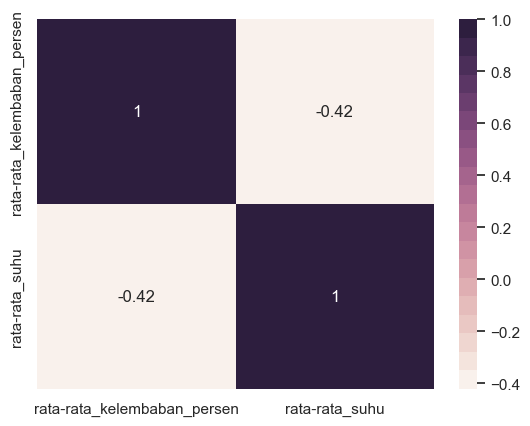

In [25]:
cols = ['rata-rata_kelembaban_persen','rata-rata_suhu']

sns.heatmap(df[cols].corr(),cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15), annot=True)
# plt.savefig('cor-suhu-kelembaban.png', bbox_inches='tight', dpi=300)
plt.show()


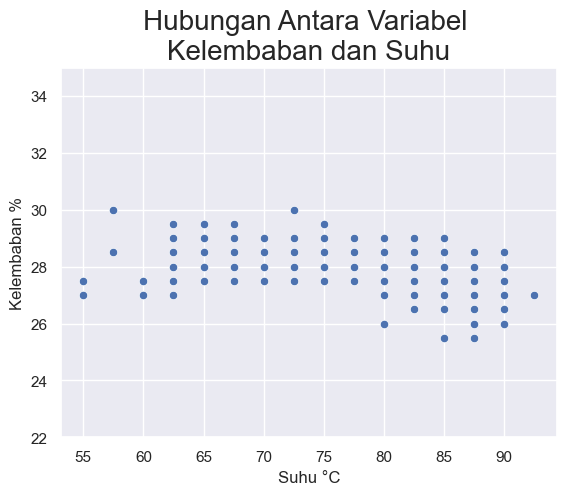

In [26]:
sns.scatterplot(x='rata-rata_kelembaban_persen',y='rata-rata_suhu',data=df)

plt.ylabel('Kelembaban %')
plt.xlabel('Suhu °C')

plt.ylim(ymin=22,ymax=35)

plt.title('Hubungan Antara Variabel \nKelembaban dan Suhu',fontsize=20)
# plt.savefig('scatter-cor-suhu-kelembaban.png', bbox_inches='tight', dpi=300)
plt.show()



Berdasrkan hasil scatter plot diatas dapat disimpulkan bahwa kedua buah variabel suhu dan kelembaban memiliki korelasi negatif. Sayangnya hubungan kedua buah variabel tersebut tidak terlihat secara signifikan.

## 4. Berapa-rata-rata suhu dan kelembabannya ?

In [27]:
#Berapa-rata-rata suhu dan kelembapan berdasarkan lokasinya?
average_temperature = df.groupby('wilayah')['rata-rata_suhu'].mean()
average_humidity = df.groupby('wilayah')['rata-rata_kelembaban_persen'].mean()


print("Suhu rata-rata:")
print(round(average_temperature,2))
print("\nKelembaban rata-rata:")
print(round(average_humidity,2))

Suhu rata-rata:
wilayah
Jakarta Barat       28.08
Jakarta Pusat       28.08
Jakarta Selatan     28.08
Jakarta Timur       28.08
Jakarta Utara       28.08
Kepulauan Seribu    28.08
Name: rata-rata_suhu, dtype: float64

Kelembaban rata-rata:
wilayah
Jakarta Barat       76.97
Jakarta Pusat       76.97
Jakarta Selatan     76.97
Jakarta Timur       76.97
Jakarta Utara       76.97
Kepulauan Seribu    76.97
Name: rata-rata_kelembaban_persen, dtype: float64


## 5. Berapa frekuensi dari data suhu dan kelembaban?

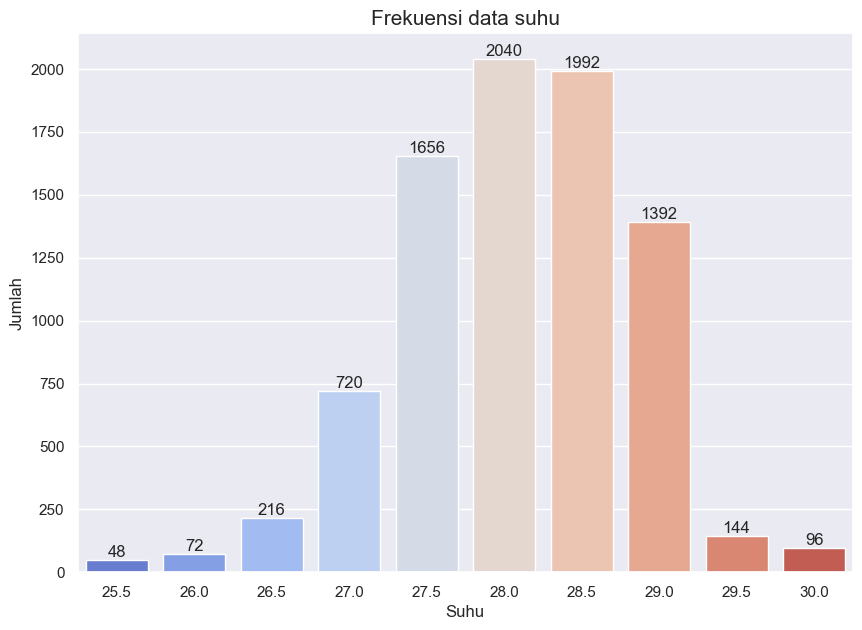

In [28]:
plt.figure(figsize=(10,7))

ax = sns.countplot(x='rata-rata_suhu', data=df,palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('Frekuensi data suhu', fontsize=15)
plt.xlabel('Suhu')
plt.ylabel('Jumlah')
# plt.savefig('freq-suhu.png', bbox_inches='tight', dpi=300)

plt.show()

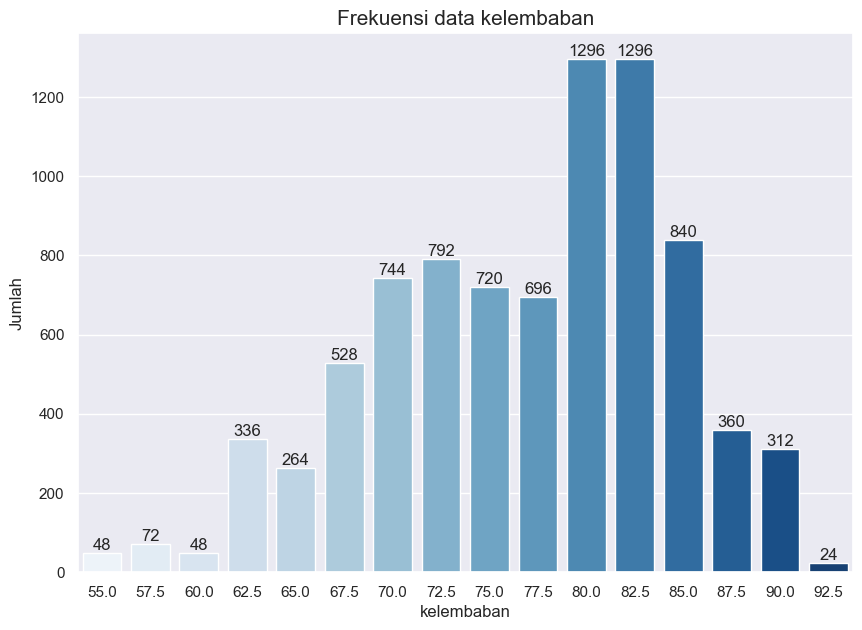

In [29]:
plt.figure(figsize=(10,7))

ax = sns.countplot(x='rata-rata_kelembaban_persen', data=df, palette='Blues')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


plt.title('Frekuensi data kelembaban', fontsize=15)
plt.xlabel('kelembaban')
plt.ylabel('Jumlah')

# plt.savefig('freq-kelembaban.png', bbox_inches='tight', dpi=300)
plt.show()

## 6. Berapa frekuensi dari data cuaca ?

In [30]:
# Menghitung frekuensi data cuaca
frekuensi_cuaca = df['cuaca'].value_counts()

# Menampilkan frekuensi data cuaca
frekuensi_cuaca

Cerah Berawan    3342
Berawan          2775
Hujan Lokal      1019
Cerah             452
Hujan Ringan      421
Hujan Petir       138
Berawan Tebal     115
Hujan Sedang      112
Hujan               2
Name: cuaca, dtype: int64

## 7 . Dari data suhu dan kelembaban, apakah kedua data tersebut memiliki outlier ?


Untuk mengetahui apakah adanya outlier atau tidak, kita dapat menggunakan boxplot untuk memvisualisasikannya. Data dikatakan memiliki outlier jika ada data yang berada di upper/lower inner fence. Sebagai berikut :

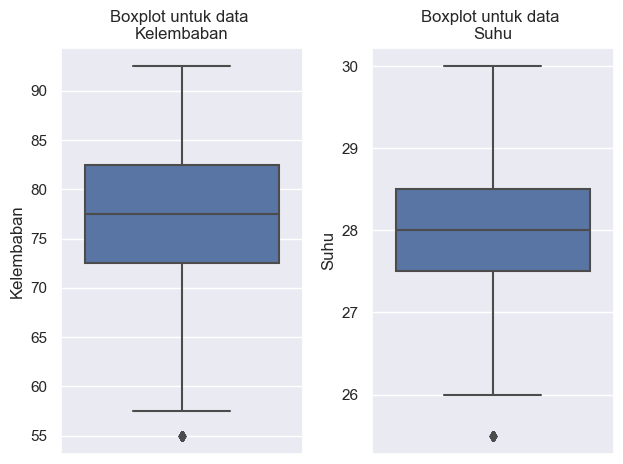

In [31]:
fig, ax = plt.subplots(1, 2)

sns.boxplot(y='rata-rata_kelembaban_persen',data=df,ax=ax[0])
sns.boxplot(y='rata-rata_suhu',data=df,ax=ax[1])

ax[0].set_title('Boxplot untuk data \nKelembaban')
ax[1].set_title('Boxplot untuk data \nSuhu')
ax[0].set_ylabel('Kelembaban')
ax[1].set_ylabel('Suhu')

fig.tight_layout()
# plt.savefig('boxplot-suhu-kelembaban.png', bbox_inches='tight', dpi=300)
plt.show()

Dapat dilihat bahwa kedua data tersebut memiliki outlier pada bagian lower fence. Berikut adalah untuk mengetahui data-data yang berada pada nilai outlier. 

In [32]:
# Mendapatkan nilai interquartile untuk mencari nilai lower inner fence
# Suhu
q1_suhu = df['rata-rata_suhu'].quantile(0.25)
q3_suhu = df['rata-rata_suhu'].quantile(0.75)
iqr_suhu = q3_suhu - q1_suhu
print('Nilai Quartil 1 untuk suhu = ',q1_suhu)
print('Nilai Quartil 3 untuk suhu = ',q3_suhu)
print('Nilai Interquartil = ',iqr_suhu)

# Kelembaban
q1_kelembaban = df['rata-rata_kelembaban_persen'].quantile(0.25)
q3_kelembaban = df['rata-rata_kelembaban_persen'].quantile(0.75)
iqr_kelembaban = q3_kelembaban - q1_kelembaban
print('\nNilai Quartil 1 untuk kelembaban = ',q1_kelembaban)
print('Nilai Quartil 3 untuk kelembaban= ',q3_kelembaban)
print('Nilai Interquartil = ',iqr_kelembaban)

low_in_suhu = q3_suhu - 1.5 * iqr_suhu
low_in_kelembaban = q3_kelembaban - 1.5 * iqr_kelembaban
print('\nlower inner fence untuk kelembaban =',low_in_suhu)
print('lower inner fence untuk suhu =',low_in_kelembaban)

Nilai Quartil 1 untuk suhu =  27.5
Nilai Quartil 3 untuk suhu =  28.5
Nilai Interquartil =  1.0

Nilai Quartil 1 untuk kelembaban =  72.5
Nilai Quartil 3 untuk kelembaban=  82.5
Nilai Interquartil =  10.0

lower inner fence untuk kelembaban = 27.0
lower inner fence untuk suhu = 67.5


In [33]:
# menampilkan data-data outliers terhadap data suhu
df[df['rata-rata_suhu']<=low_in_suhu]

,tanggal,wilayah,waktu,cuaca,rata-rata_kelembaban_persen,rata-rata_suhu,bulan
312,2018-01-15,Jakarta Timur,Pagi,Berawan,82.5,26.5,January
313,2018-01-15,Jakarta Barat,Pagi,Berawan,82.5,26.5,January
314,2018-01-15,Jakarta Selatan,Pagi,Berawan,82.5,26.5,January
315,2018-01-15,Kepulauan Seribu,Pagi,Hujan Ringan,82.5,26.5,January
316,2018-01-15,Jakarta Pusat,Pagi,Berawan,82.5,26.5,January
...,...,...,...,...,...,...,...
595,2018-12-26,Jakarta Barat,Dini Hari,Berawan,90.0,27.0,December
596,2018-12-26,Jakarta Selatan,Dini Hari,Berawan,90.0,27.0,December
597,2018-12-26,Kepulauan Seribu,Dini Hari,Berawan,90.0,27.0,December
598,2018-12-26,Jakarta Pusat,Dini Hari,Berawan,90.0,27.0,December


In [34]:
# menampilkan data-data outliers terhadap data kelembaban
df[df['rata-rata_kelembaban_persen']<=low_in_kelembaban]

,tanggal,wilayah,waktu,cuaca,rata-rata_kelembaban_persen,rata-rata_suhu,bulan
408,2018-06-19,Jakarta Timur,Pagi,Cerah Berawan,67.5,28.0,June
409,2018-06-19,Jakarta Barat,Pagi,Cerah Berawan,67.5,28.0,June
410,2018-06-19,Jakarta Selatan,Pagi,Cerah Berawan,67.5,28.0,June
411,2018-06-19,Kepulauan Seribu,Pagi,Cerah Berawan,67.5,28.0,June
412,2018-06-19,Jakarta Pusat,Pagi,Cerah Berawan,67.5,28.0,June
...,...,...,...,...,...,...,...
283,2018-11-13,Jakarta Barat,Dini Hari,Hujan Ringan,67.5,29.0,November
284,2018-11-13,Jakarta Selatan,Dini Hari,Hujan Lokal,67.5,29.0,November
285,2018-11-13,Kepulauan Seribu,Dini Hari,Hujan Petir,67.5,29.0,November
286,2018-11-13,Jakarta Pusat,Dini Hari,Hujan Ringan,67.5,29.0,November


## 8. Apakah ada hubungan antara kelembaban udara dengan cuaca ?

untuk membuktikannya kita akan mencoba mengelompokan data berdsarkan cuaca. Setelah itu kita akan mengambil rata-rata kelembabannya dan kita akan mebandingkannya.

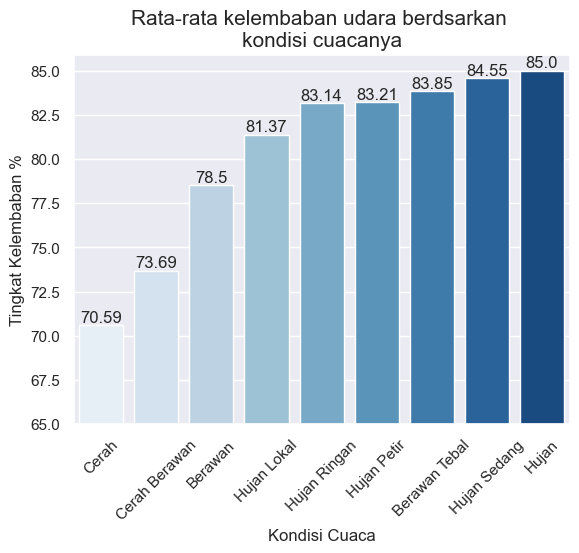

In [35]:
#grouping
gabung = pd.DataFrame(df.groupby('cuaca')['rata-rata_kelembaban_persen'].mean().round(2).sort_values(ascending=True)
                     ).reset_index()

# plotting
ax = sns.barplot(x='cuaca',y='rata-rata_kelembaban_persen',data=gabung,palette='Blues')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


plt.ylim(ymin=65,ymax=85.9)
plt.xticks(rotation=45)
plt.title('Rata-rata kelembaban udara berdsarkan \nkondisi cuacanya', fontsize=15)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Tingkat Kelembaban %', fontsize=12)

# plt.savefig('cor-suhu-cuaca.png', bbox_inches='tight', dpi=300)
plt.show()

Dari grafik ini dapat disimpulkan bahwa ada perbedaan yang signifikan antara kelembaban udara saat kondisi cuaca cerah hingga hujan. Saat kondisi cuaca cerah rata-rata tingkat kelembabannya berada pada nilai 70% terus menaik saat kondisi cuaca hujan rata-rata kelembabannya mencapai 85%.

# Modeling

## Regresi Linear

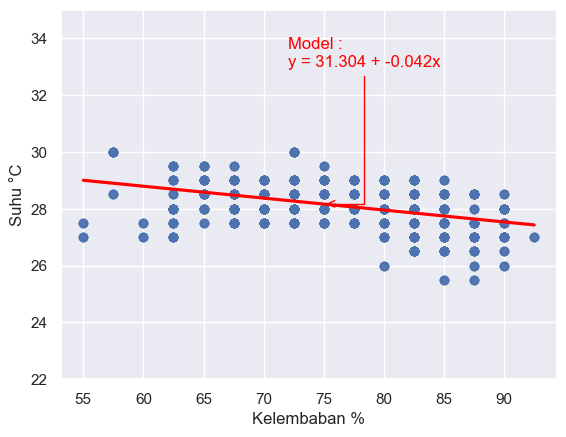

In [36]:
sns.regplot(x='rata-rata_kelembaban_persen',y='rata-rata_suhu',data=df, scatter_kws={'alpha': 0.1},line_kws={'color':'red'});

# plt.title()
plt.xlabel('Kelembaban %')
plt.ylabel('Suhu °C')
plt.ylim(ymin=22,ymax=35)


plt.annotate('Model :\ny = 31.304 + -0.042x',xy=(75, 28.17),xytext=(72,33),color='red',
            arrowprops=dict(arrowstyle='->',connectionstyle='angle',color='red'))

# plt.savefig('replot-kelembaban-suhu.png', bbox_inches='tight', dpi=300)
plt.show()

In [37]:
df.sample()

,tanggal,wilayah,waktu,cuaca,rata-rata_kelembaban_persen,rata-rata_suhu,bulan
346,2018-05-16,Jakarta Pusat,Siang,Hujan Ringan,85.0,28.5,May


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [39]:
y = df['rata-rata_suhu'].values
x = df['rata-rata_kelembaban_persen'].values.reshape(-1,1)

lm = LinearRegression()
lm.fit(x, y)

for i in lm.predict(np.array([70]).reshape(-1,1)):
    print(f'Nilai Prediksi : {round(i,1)}°C')

Nilai Prediksi : 28.4°C


# Evaluating

In [40]:
def get_mse(df, feature, target='rata-rata_suhu'):
    # Get x, y to model
    y = df[target].values
    x = df[feature].values.reshape(-1,1)
    print('{} ~ {}'.format(target, feature))
    
    # Build and fit the model
    lm = LinearRegression()
    lm.fit(x, y)
    msg = 'model: y = {:.3f} + {:.3f}x'\
            .format(lm.intercept_, lm.coef_[0])
    print(msg)
    
    # Predict and determine MSE
    y_pred = lm.predict(x)
    error = mean_squared_error(y, y_pred)
    print('mse = {:.2f}'.format(error))
    print()

In [41]:
get_mse(df,feature='rata-rata_kelembaban_persen')

rata-rata_suhu ~ rata-rata_kelembaban_persen
model: y = 31.304 + -0.042x
mse = 0.47



## Decision Tree

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Memisahkan fitur (suhu dan kelembaban) dan target (cuaca)
X = df[['rata-rata_suhu', 'rata-rata_kelembaban_persen']]
y = df['cuaca']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek Decision Tree Classifier
model = DecisionTreeClassifier()

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Menampilkan hasil evaluasi model
print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

      Berawan       0.43      0.48      0.45       572
Berawan Tebal       0.00      0.00      0.00        20
        Cerah       0.43      0.09      0.16        95
Cerah Berawan       0.54      0.79      0.64       671
  Hujan Lokal       0.29      0.04      0.07       193
  Hujan Petir       0.00      0.00      0.00        24
 Hujan Ringan       0.60      0.08      0.14        76
 Hujan Sedang       0.00      0.00      0.00        25

     accuracy                           0.49      1676
    macro avg       0.29      0.18      0.18      1676
 weighted avg       0.45      0.49      0.43      1676



C:\Users\Afra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Afra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Afra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


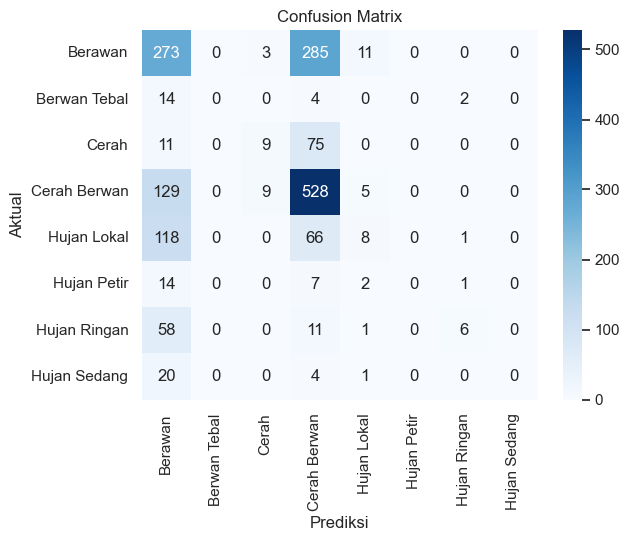

In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

label_class = ["Berawan", "Berwan Tebal", "Cerah", "Cerah Berwan", "Hujan Lokal", "Hujan Petir", "Hujan Ringan", "Hujan Sedang"]
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5], labels=label_class, rotation=90)

plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5], labels=label_class, rotation=0)

# Menambahkan label pada sumbu x dan y
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

# Menambahkan judul pada plot
plt.title("Confusion Matrix")

# Menampilkan plot
# plt.savefig('confusion-matrix.png', bbox_inches='tight', dpi=300)
plt.show()

In [43]:
from sklearn.tree import export_graphviz
import graphviz

# Menghasilkan representasi pohon dalam format DOT
dot_data = export_graphviz(model, out_file=None, feature_names=X.columns, class_names=model.classes_, filled=True)

# Membuat objek graph dari data DOT
graph = graphviz.Source(dot_data)

# Menampilkan grafik pohon
graph.view()


'Source.gv.pdf'

In [44]:
# Import library yang dibutuhkan
from sklearn.tree import DecisionTreeClassifier

# Fungsi untuk melakukan prediksi pada data baru
def predict(tree, X_new):
    # Jika node saat ini merupakan node daun, return label kelas pada node
    if tree.left is None and tree.right is None:
        return tree.label
    # Jika fitur pada node memenuhi kriteria pemisahan data baru, rekursif panggil fungsi predict
    # dengan node anak kiri dan data baru yang telah dipisahkan
    if X_new[tree.feature] <= tree.threshold:
        return predict(tree.left, X_new)
    # Jika fitur pada node tidak memenuhi kriteria pemisahan data baru, rekursif panggil fungsi predict
    # dengan node anak kanan dan data baru yang telah dipisahkan
    else:
        return predict(tree.right, X_new)

# Membangun model Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Melakukan prediksi pada data baru

X_new = [[28.5, 65]]  # Contoh data baru dengan suhu 65 dan kelembaban 80
prediction = tree.predict(X_new)
print(prediction)


['Cerah Berawan']


C:\Users\Afra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
